<Axes: >

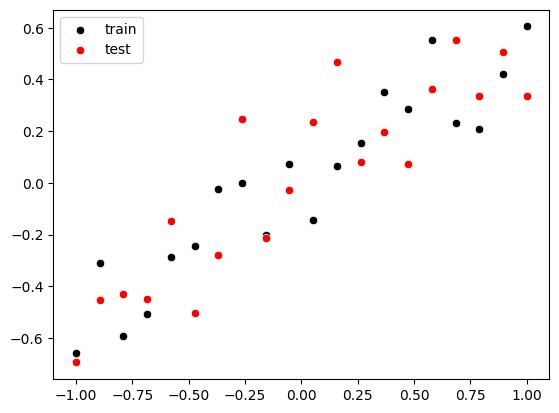

In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error



# Training data
x_train = np.linspace(-1, 1, 20)
y_train = np.array([
    -0.6561, -0.3099, -0.59035, -0.50855, -0.285, -0.2443,
    -0.02445, 0.00135, -0.2006, 0.07475,
    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
    0.5524, 0.23115, 0.20835, 0.4211, 0.60485
])

# Test data
x_test = np.linspace(-1, 1, 20)
y_test = np.array([
    -0.69415, -0.451, -0.43005, -0.4484, -0.1475, -0.5019,
    -0.28055, 0.24595, -0.21425, -0.0286,
    0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
    0.3639, 0.5536, 0.3365, 0.50705, 0.33435
])

sns.scatterplot(x=x_train,y=y_train,c="black",label ="train")
sns.scatterplot(x=x_test,y=y_test,c="red",label ="test")

In [82]:
model = Sequential()

model.add(Dense(128,activation="relu",input_dim = 1))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))


adam = Adam(learning_rate=0.01)
model.compile(loss="mse",metrics=["mse"],optimizer=adam)
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
train_loss, train_mse = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mse = model.evaluate(x_test, y_test, verbose=0)

print(f"Training MSE = {train_mse}")
print(f"Testing  MSE = {test_mse}")


Training MSE = 0.0041747139766812325
Testing  MSE = 0.0447063222527504


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


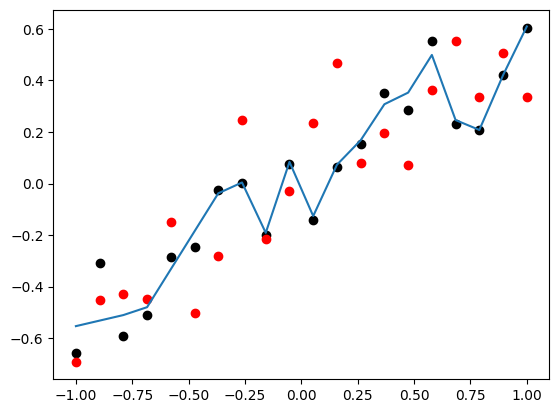

In [84]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.scatter(x=x_train , y=y_train, color="black", label="train")
plt.scatter(x=x_test, y=y_test, color="red", label="test")
plt.plot(x_test, y_pred)


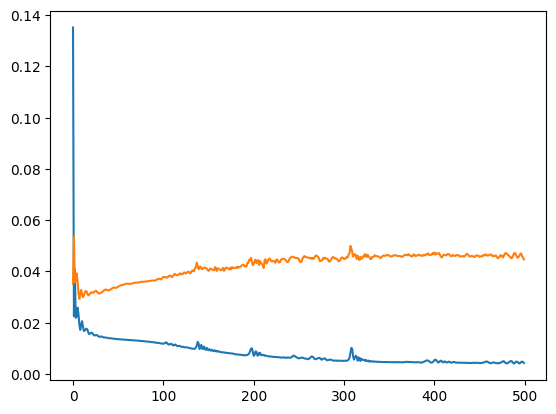

In [85]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

OVERFITTING CAN BE SEEN ABOVE

SOLVING THE PROBLEM OF OVERFITTING

In [86]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

adam1 = Adam(learning_rate=0.01)


model1 = Sequential()

model1.add(Dense(128,activation="relu",input_dim = 1))
model1.add(Dropout(0.2))

model1.add(Dense(128,activation="relu"))
model1.add(Dropout(0.2))

model1.add(Dense(1,activation="linear"))


model1.compile(loss="mse",metrics=["mse"],optimizer=adam1)

history1 = model1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

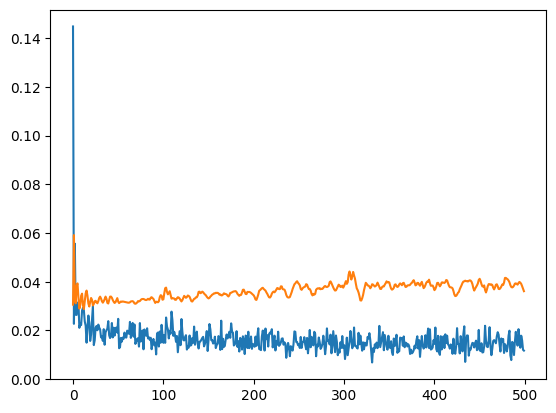

In [87]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])

In [88]:
train_loss1, train_mse1 = model1.evaluate(x_train, y_train, verbose=0)
test_loss1, test_mse1 = model1.evaluate(x_test, y_test, verbose=0)

print(f"Training MSE = {train_mse1}")
print(f"Testing  MSE = {test_mse1}")

Training MSE = 0.011008070781826973
Testing  MSE = 0.036134641617536545


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


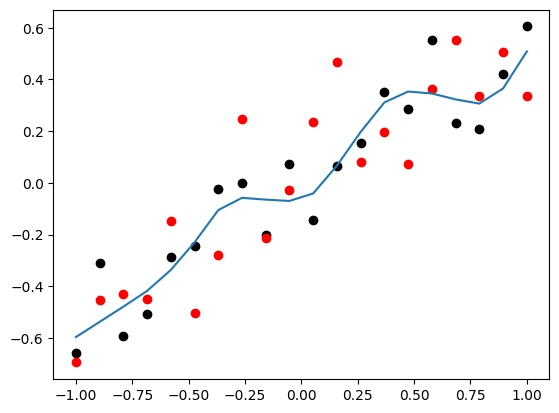

In [89]:
import matplotlib.pyplot as plt

y_pred = model1.predict(x_test)

plt.scatter(x=x_train , y=y_train, color="black", label="train")
plt.scatter(x=x_test, y=y_test, color="red", label="test")
plt.plot(x_test, y_pred)

NOW LETS TRY FOR DROPOUT RATIO TO BE 0.5

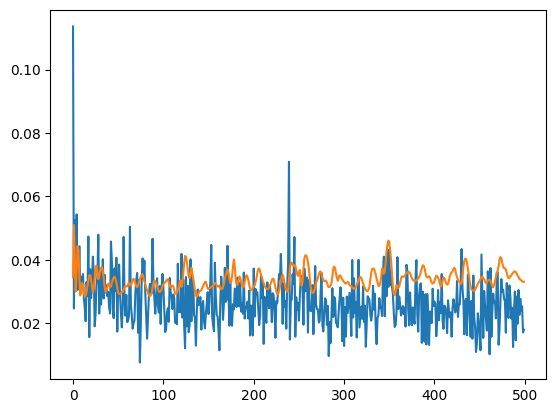

In [91]:
adam2 = Adam(learning_rate=0.01)


model2 = Sequential()

model2.add(Dense(128,activation="relu",input_dim = 1))
model2.add(Dropout(0.5))

model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation="linear"))


model2.compile(loss="mse",metrics=["mse"],optimizer=adam2)

history2 = model2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])



In [92]:
train_loss2, train_mse2 = model2.evaluate(x_train, y_train, verbose=0)
test_loss2, test_mse2 = model2.evaluate(x_test, y_test, verbose=0)

print(f"Training MSE = {train_mse2}")
print(f"Testing  MSE = {test_mse2}")




Training MSE = 0.01431002002209425
Testing  MSE = 0.03309491276741028


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


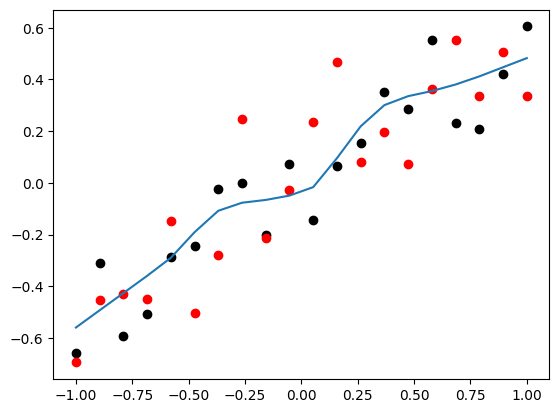

In [93]:
y_pred = model2.predict(x_test)
plt.scatter(x=x_train , y=y_train, color="black", label="train")
plt.scatter(x=x_test, y=y_test, color="red", label="test")
plt.plot(x_test, y_pred)